In [55]:
import numpy as np
import matplotlib.pyplot as plt

import random

from sklearn.datasets import make_blobs

In [61]:
X, y = make_blobs(100, centers=4, random_state=42)

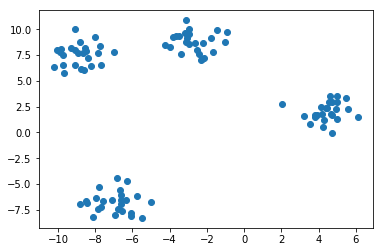

In [62]:
plt.scatter(X[:, 0], X[:, 1])

In [63]:
class Cluster:
    
    def __init__(self, center, label):
        
        self.center = center
        self.label = label
        self.points = []
    
    
    def relocate(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
        
    def distance(self, point):
        return np.sqrt(((self.center - point) ** 2).sum())

In [72]:
class KMeansCustom:
    
    def __init__(self, n_clusters=3, max_iters=20, n_init=10):
        
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.n_init = n_init
        
    def fit(self, X):
        
        self.__X = X
        
        steps = []
        
        for simulation in range(self.n_init):

            clusters = []

            for i in range(self.n_clusters):
                cluster = Cluster(random.choice(X), i)
                clusters.append(cluster)

            errors = []

            for i in range(self.max_iters):
                labels = []

                for point in X:
                    distances = []

                    for cluster in clusters:
                        dis = cluster.distance(point)
                        distances.append((dis, cluster))

                    index = np.array(distances)[:, 0].argmin()

                    selected_dis, selected_cluster = distances[index]

                    selected_cluster.points.append(point)
                    labels.append(selected_cluster.label)

                for cluster in clusters:
                    cluster.relocate()

                errors.append(self.error(labels, clusters))

            final_error = errors[-1]
            
            steps.append((final_error, labels, clusters))

        index = np.array(steps)[:, 0].argmin()
        
        result_err, result_labels, result_clusters = steps[index]
        
        self.labels_ = result_labels
        self.cluster_centers_ = [cluster.center for cluster in result_clusters]
        
        return result_err

            
    def error(self, labels, clusters):
        
        error = 0
        
        for point, label in zip(self.__X, labels):
            cluster = clusters[label]
            error += cluster.distance(point)
            
        return error
            
        

In [65]:
random.choice(X)

array([-8.66514683,  7.7088403 ])

In [73]:
errors = []

for i in range(2, 7):
    model = KMeansCustom(i, n_init=10)
    err = model.fit(X)
    errors.append(err)

/Users/anuj/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/anuj/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [75]:
errors

[469.0815900982103,
 222.22292946168034,
 117.09055020376414,
 109.49574306645115,
 102.42770505185011]

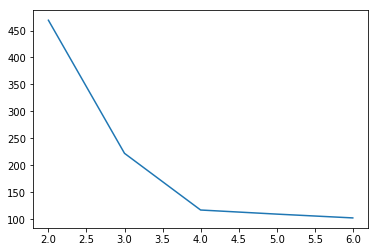

In [76]:
plt.plot(np.arange(2, 7), errors)

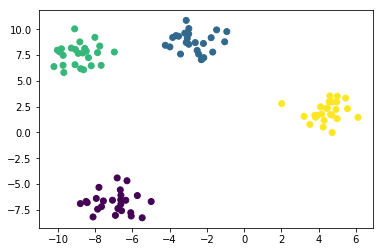

In [71]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

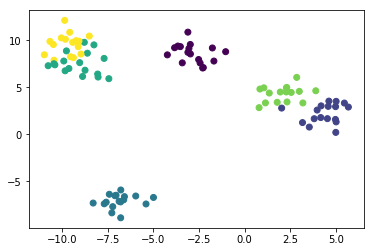

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y)